In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#1
cancer_df = pd.read_csv('https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv')
cancer_df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

In [10]:
#2
X = cancer_df[feature_cols] 

y = cancer_df['Malignant_Cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(X_test)

     Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
6                  1                        1                         1   
3                  6                        8                         8   
113                5                        6                         7   
12                 7                        4                         6   
24                 5                        6                         5   
129                5                        8                         8   
25                10                       10                        10   
108                7                        2                         4   
128                6                        1                         1   
45                10                        4                         2   
48                 8                        3                         8   
42                 9                       10                        10   
35                10     

In [237]:
my_decisiontree = DecisionTreeClassifier(random_state=2)
my_decisiontree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

In [238]:
#3
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)
score_dt = accuracy_score(y_test, y_predict_dt)
print('Decision tree accuracy: ')
print(score_dt)

y_predict_dt_proba = my_decisiontree.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_dt_proba[:,1], pos_label=1)

dt_AUC = metrics.auc(fpr, tpr)
print('Decision tree AUC: ')
print(dt_AUC)

Decision tree accuracy: 
0.8666666666666667
Decision tree AUC: 
0.8697478991596639


In [239]:
#4
tree_predictions = []
for i in range(29):
    bootstarp_size = int(0.8*len(cancer_df))
    x_bag, y_bag = resample(X_train, y_train, n_samples = bootstarp_size , random_state=i , replace = True) 
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(x_bag, y_bag)
    y_predict_bag = Base_DecisionTree.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict_bag)
    tree_predictions.append(accuracy)
print(tree_predictions)


def Average(tree_predictions): 
    return sum(tree_predictions) / len(tree_predictions)

bagging_avg = Average(tree_predictions)


[0.7777777777777778, 0.8666666666666667, 0.8666666666666667, 0.8444444444444444, 0.8222222222222222, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8888888888888888, 0.8, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8888888888888888, 0.8222222222222222, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8, 0.8666666666666667, 0.8666666666666667, 0.8222222222222222, 0.8444444444444444, 0.8, 0.8888888888888888]


In [240]:
#4
def vote(input):
    member = max(set(input), key=input.count)
    return member
vote_y_test = vote(tree_predictions)
print('Bagging voting: ')
print(vote_y_test)
print('Bagging accuracy mean: ')
print(bagging_avg)

Bagging voting: 
0.8444444444444444
Bagging accuracy mean: 
0.8482758620689658


In [241]:

fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_predict_bag, pos_label=1)


In [242]:
#4
AUC = metrics.auc(fpr1, tpr1)


print('Bagging AUC: ')
print(AUC)

Bagging AUC: 
0.8644957983193278


In [243]:
#5
from   sklearn.ensemble   import     AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_AdaBoost_predict = my_AdaBoost.predict(X_test)
adaBoost_score = accuracy_score(y_test, y_AdaBoost_predict)

y_predict_ada_proba = my_AdaBoost.predict_proba(X_test)

fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_predict_ada_proba[:,1], pos_label=1)

ada_AUC = metrics.auc(fpr2, tpr2)

print("Ada accuracy: ")
print(adaBoost_score)
print("Ada AUC: ")
print(ada_AUC)

Ada accuracy: 
0.9555555555555556
Ada AUC: 
0.9653361344537815


In [244]:
#6
from   xgboost   import   XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
my_XGBoost.fit(X_train, y_train)
y_XGBoost_predict = my_XGBoost.predict(X_test)
xG_score = accuracy_score(y_test, y_XGBoost_predict)

y_predict_xg_proba = my_XGBoost.predict_proba(X_test)

fpr3, tpr3, thresholds = metrics.roc_curve(y_test, y_predict_xg_proba[:,1], pos_label=1)

xg_AUC=metrics.auc(fpr3, tpr3)


print("XGBoost accuracy: ")
print(xG_score)
print("XGBoost AUC: ")
print(xg_AUC)

[23:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy: 
0.9555555555555556
XGBoost AUC: 
0.9716386554621849


C:\Users\Michael Scott\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [248]:
#7
from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
my_RandomForest.fit(X_train, y_train)
y_predict_rf = my_RandomForest.predict(X_test)

score_rf = accuracy_score(y_test, y_predict_rf)

y_predict_rf_proba = my_RandomForest.predict_proba(X_test)

fpr4, tpr4, thresholds = metrics.roc_curve(y_test, y_predict_rf_proba[:,1], pos_label=1)
rf_AUC = metrics.auc(fpr4, tpr4)
print("Random Forest accuracy: ")
print(score_rf)
print("Random Forest AUC: ")
print(rf_AUC)

Random Forest accuracy: 
0.9555555555555556
Random Forest AUC: 
0.9516806722689075


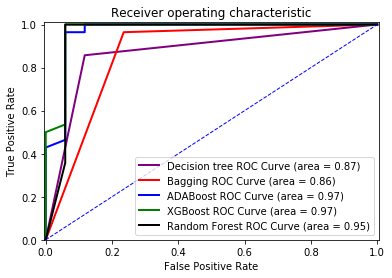

In [249]:
#8
plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='purple', lw=2, 
         label='Decision tree ROC Curve (area = %0.2f)' % dt_AUC)
plt.plot(fpr1, tpr1, color='red', lw=2, 
         label='Bagging ROC Curve (area = %0.2f)' % AUC)
plt.plot(fpr2, tpr2, color='blue', lw=2, 
         label='ADABoost ROC Curve (area = %0.2f)' % ada_AUC)
plt.plot(fpr3, tpr3, color='green', lw=2, 
         label='XGBoost ROC Curve (area = %0.2f)' % xg_AUC)
plt.plot(fpr4, tpr4, color='black', lw=2, 
         label='Random Forest ROC Curve (area = %0.2f)' % rf_AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')


# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [247]:
print('The best algorithm with respect to the AUC curve is XGBoost with 0.971')
print('The best algorithm with respect to the accuracy value is XGBoost, Ada_Boost, and Random Forest with 0.955')
print('The best algorithm with a false positive rate of 7% is the Random Forest')

The best algorithm with respect to the AUC curve is XGBoost with 0.971
The best algorithm with respect to the accuracy value is XGBoost, Ada_Boost, and Random Forest with 0.955
The best algorithm with a false positive rate of 7% is the Random Forest
